In [1]:
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math

In [24]:
def smooth(img):
    mask = [[2,4,5,4,2],[4,9,12,9,4],[5,12,15,12,5],[4,9,12,9,4],[2,4,5,4,2]]
    r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    win_size = int(len(mask)/2)
    output = np.zeros(np.shape(gray))
    gray = np.pad(gray, win_size, 'symmetric')
    for x in range(win_size, len(gray)-win_size):
        for y in range(win_size, len(gray[0])-win_size):
            output[x-win_size][y-win_size] = (np.sum(np.multiply(gray[x-win_size:x+win_size+1, y-win_size:y+win_size+1], mask)))/159
            
    return output

In [25]:
im = Img.open('geisel.jpg')
geisel = np.asarray(im)
gsmoothed = smooth(geisel)

(476, 640, 3) (476, 640)


Text(0.5, 1.0, 'noise free')

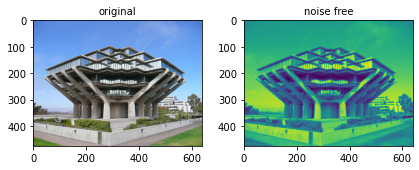

In [26]:
print(np.shape(im), np.shape(gsmoothed))
fig, axs = plt.subplots(1, 2)
fig.tight_layout()
axs[0].imshow(im)
axs[0].set_title('original', fontsize=10)
axs[1].imshow(gsmoothed)
axs[1].set_title('noise free', fontsize=10)

In [27]:
def sobel(img):
    mask1 = [[-1,0,1],[-2,0,2],[-1,0,1]]
    mask2 = [[-1,-2,-1],[0,0,0],[1,2,1]]
    mag = np.zeros(np.shape(img))
    theta = np.zeros(np.shape(img))
    img = np.pad(img, 1, 'symmetric')
    for x in range(1, len(img)-1):
        for y in range(1, len(img[0])-1):
            kx = np.sum(np.multiply(img[x-1:x+2, y-1:y+2], mask1))
            ky = np.sum(np.multiply(img[x-1:x+2, y-1:y+2], mask2))
            mag[x-1][y-1] = math.sqrt(pow(kx,2)+pow(ky,2))
            theta[x-1][y-1] = math.atan(ky/kx)
            
    return mag, theta

In [28]:
gmag, gtheta = sobel(gsmoothed)

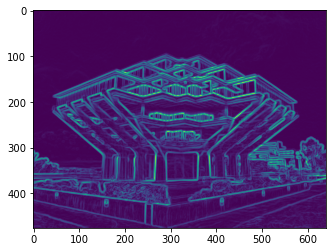

In [48]:
plt.imshow(gmag)

In [31]:
def rounddir(img):
    output = np.zeros(np.shape(img))
    for i in range(len(img)):
        for j in range(len(img[0])):
            val = img[i][j]
            if 0<=val<math.pi/4:
                output[i][j] = 1
            elif math.pi/4<=val<math.pi/2:
                output[i][j] = 2
            elif math.pi/2<=val<math.pi*3/4:
                output[i][j] = 3
            elif math.pi*3/4<=val<math.pi:
                output[i][j] = 4
            elif -math.pi/4<=val<0:
                output[i][j] = 5
            elif -math.pi/2<=val<-math.pi/4:
                output[i][j] = 6
            elif -math.pi*3/4<=val<-math.pi/2:
                output[i][j] = 7
            elif -math.pi<=val<-math.pi*3/4:
                output[i][j] = 8
                
    return output

In [36]:
def NMS(mag, theta):
    output = np.zeros(np.shape(mag))
    for i in range(len(theta)):
        for j in range(len(theta[0])):
            if theta[i][j] == 1 or theta[i][j] == 5:
                if i>0 and i<len(mag)-1 and j>0 and j<len(mag[0])-1:
                    if not (mag[i][j] > mag[i-1][j+1] and mag[i][j] > mag[i+1][j-1]):
                        output[i][j] = 0
                    else:
                        output[i][j] = mag[i][j]
            elif theta[i][j] == 2 or theta[i][j] == 6:
                if i>0 and i<len(mag)-1 and j>0 and j<len(mag[0])-1:
                    if not (mag[i][j] > mag[i-1][j] and mag[i][j] > mag[i+1][j]):
                        output[i][j] = 0
                    else:
                        output[i][j] = mag[i][j]
            elif theta[i][j] == 3 or theta[i][j] == 7:
                if i>0 and i<len(mag)-1 and j>0 and j<len(mag[0])-1:
                    if not (mag[i][j] > mag[i-1][j-1] and mag[i][j] > mag[i+1][j+1]):
                        output[i][j] = 0
                    else:
                        output[i][j] = mag[i][j]
            elif theta[i][j] == 4 or theta[i][j] == 8:
                if i>0 and i<len(mag)-1 and j>0 and j<len(mag[0])-1:
                    if not (mag[i][j] > mag[i][j-1] and mag[i][j] > mag[i][j+1]):
                        output[i][j] = 0
                    else:
                        output[i][j] = mag[i][j]
                    
    return output

In [37]:
gthetaround = rounddir(gtheta)
gnms = NMS(gmag, gthetaround)

Text(0.5, 1.0, 'NMS')

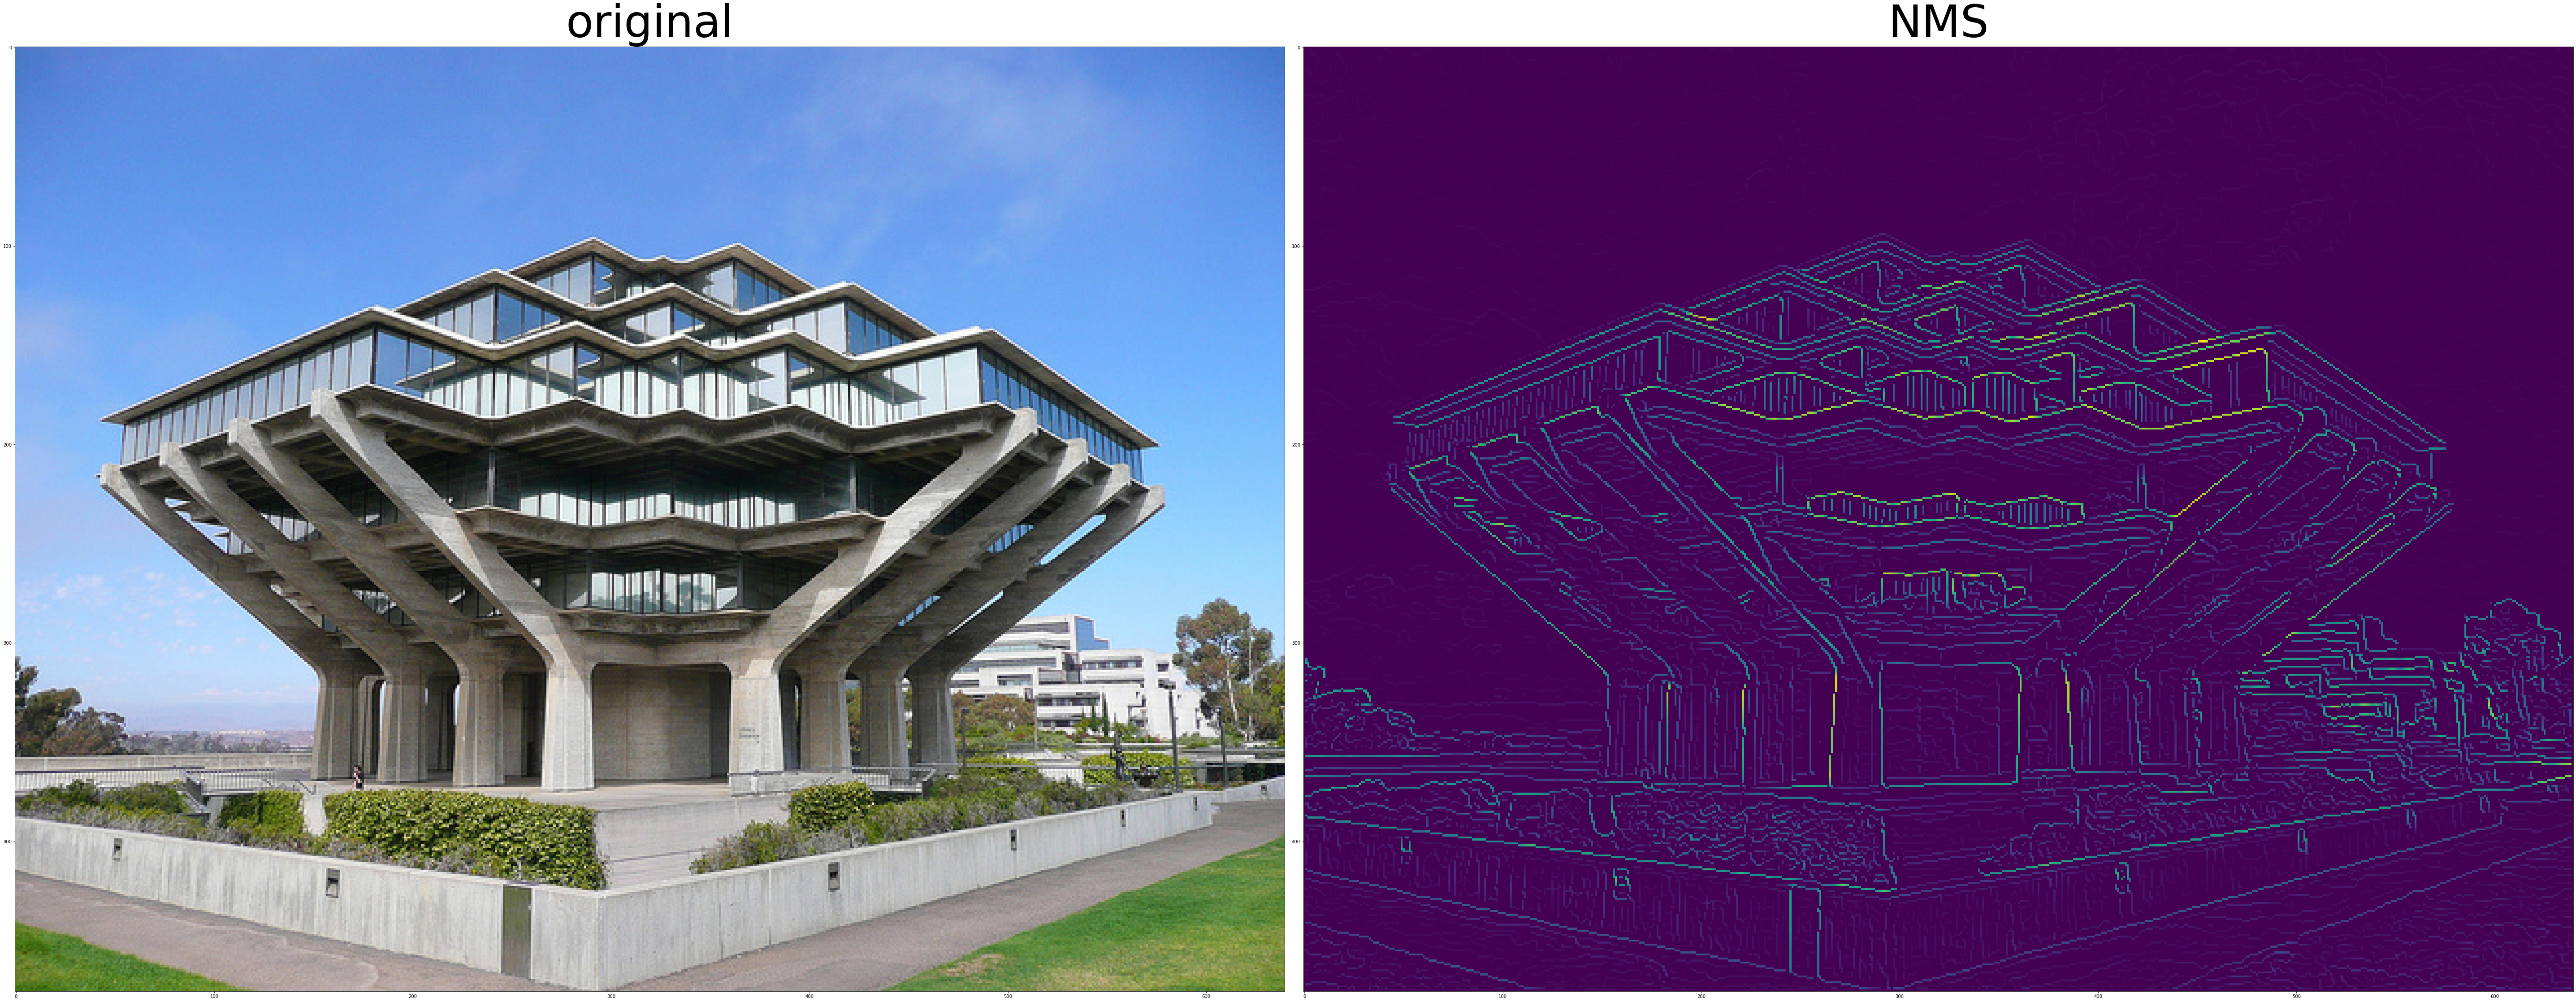

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(80, 69))
fig.tight_layout()
axs[0].imshow(im)
axs[0].set_title('original', fontsize=100)
axs[1].imshow(gnms)
axs[1].set_title('NMS', fontsize=100)

Text(0.5, 1.0, 'threshold')

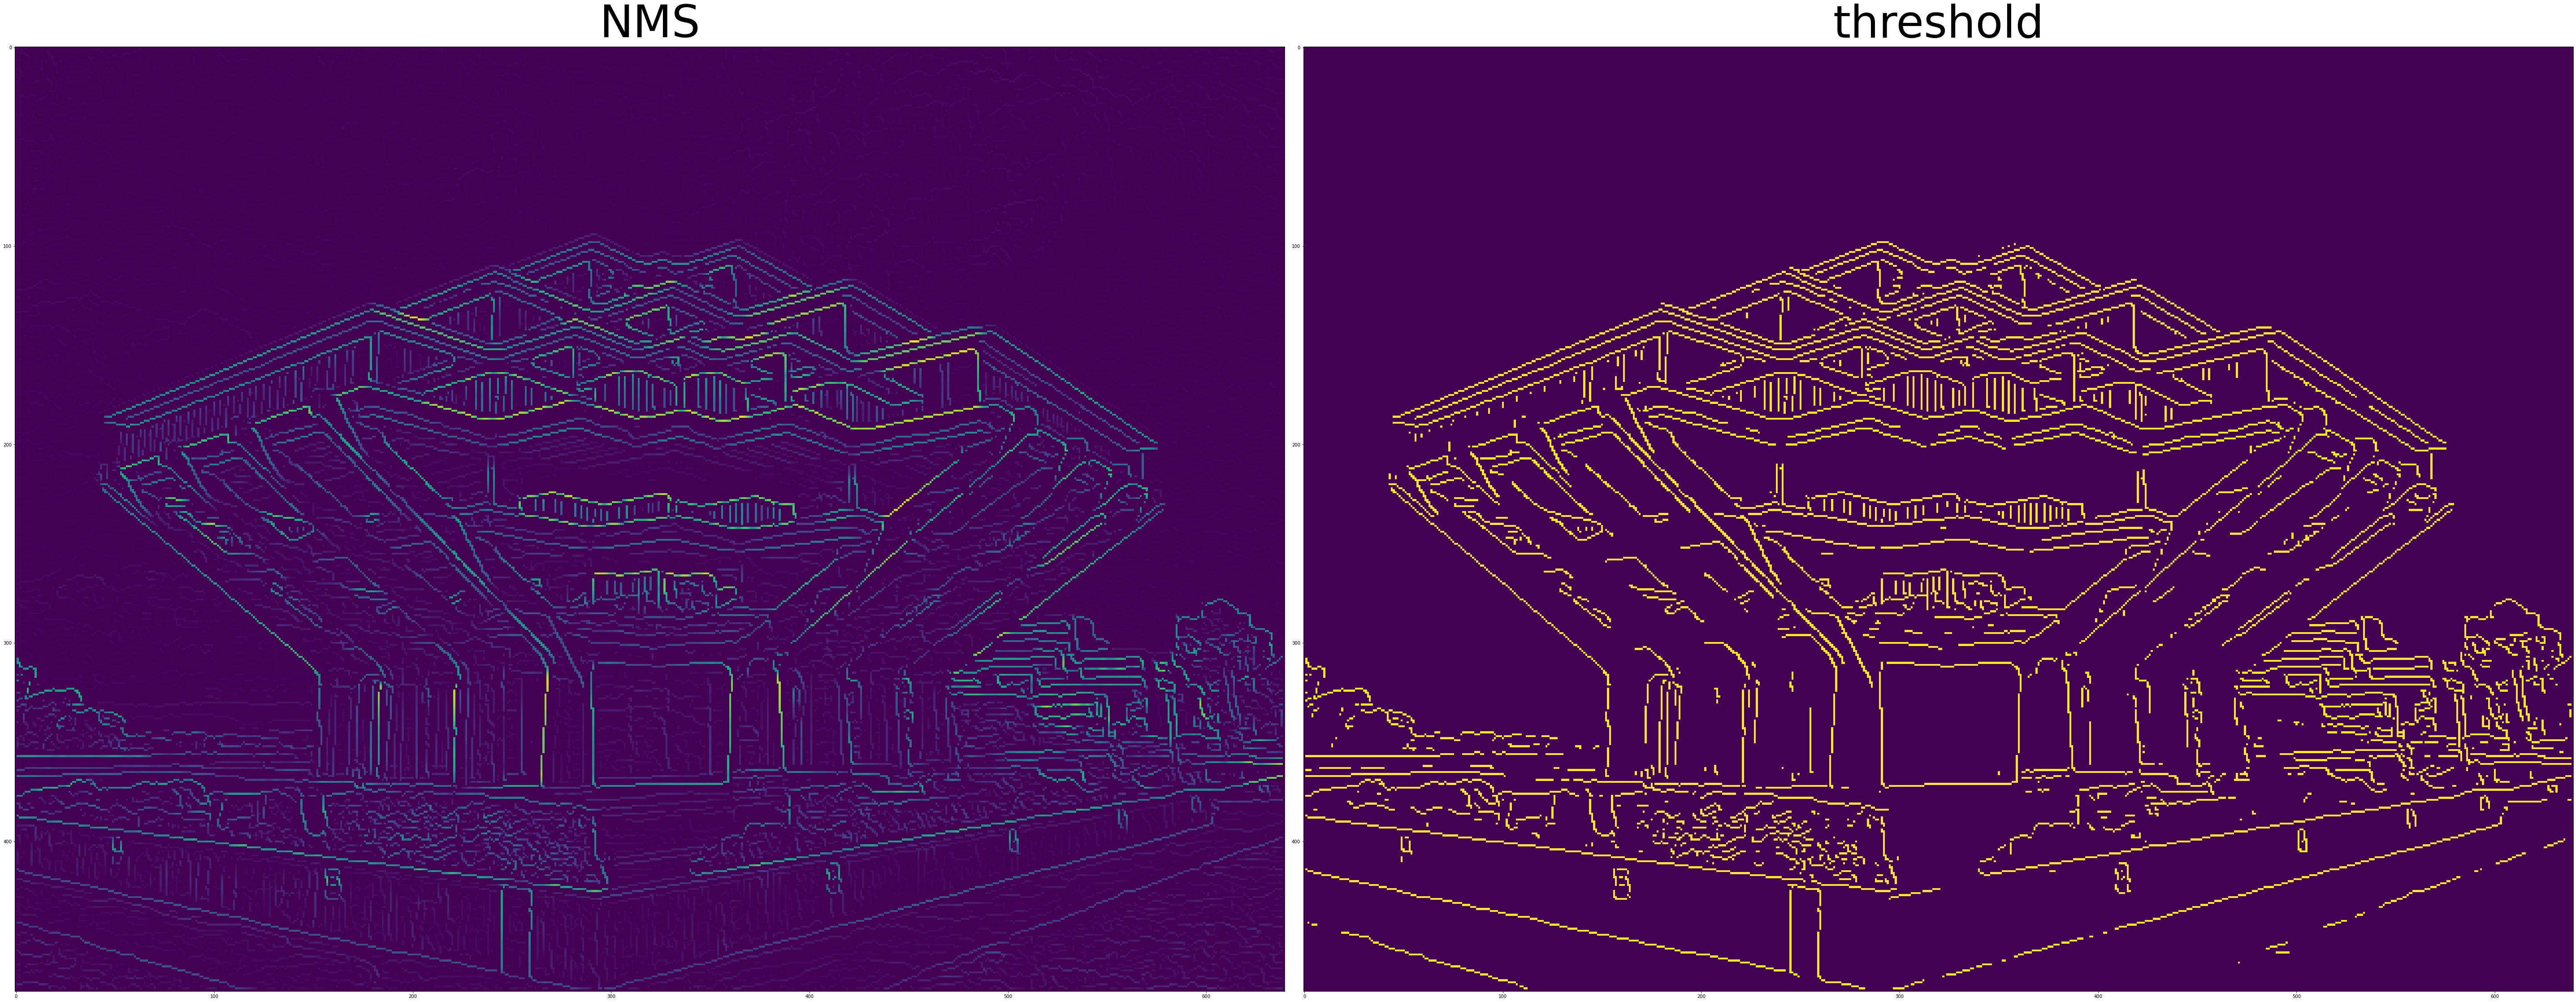

In [52]:
threshold = (gnms>80)
fig, axs = plt.subplots(1, 2, figsize=(80, 69))
fig.tight_layout()
axs[0].imshow(gnms)
axs[0].set_title('NMS', fontsize=100)
axs[1].imshow(threshold)
axs[1].set_title('threshold', fontsize=100)